### Inference Connection portal to identify fake products registered using a Blockchain Network

In [1]:
import qrcode
import json
from PIL import Image
from web3 import Web3
from web3.middleware import ExtraDataToPOAMiddleware
from eth_account import Account
Account.enable_unaudited_hdwallet_features()

ganache_url = "http://127.0.0.1:8545"
w3 = Web3(Web3.HTTPProvider(ganache_url))

w3.middleware_onion.inject(ExtraDataToPOAMiddleware, layer=0)

if w3.is_connected():
    print("Connected to Ganache")
else:
    print("Failed to connect")

contract_address = "0x7Ef1b11bb8825B601f3F30D239e42A9698aB1E5b"
contract_abi = json.load(open("abi.json", "r"))

contract = w3.eth.contract(address=contract_address, abi=contract_abi)

mnemonic = "ski winner raise venture bacon giggle heart coconut mail orbit over stay"
account = Account.from_mnemonic(mnemonic, account_path="m/44'/60'/0'/0/0")

gas_price = 2000000000
gas_limit = 500000

def generate_qr_code(product_id: str, filename: str):
    qr = qrcode.make(product_id)
    qr.save(filename)
    print(f"QR Code for {product_id} saved as {filename}")

def register_product(product_id: str, product_name: str, manufacturer: str):
    tx = contract.functions.registerProduct(product_id, product_name, manufacturer).build_transaction({
        'from': account.address,
        'gas': gas_limit,
        'gasPrice': gas_price,
        'nonce': w3.eth.get_transaction_count(account.address),
    })

    signed_tx = w3.eth.account.sign_transaction(tx, private_key=account._private_key)

    tx_hash = w3.eth.send_raw_transaction(signed_tx.raw_transaction)
    print(f"Transaction hash: {w3.to_hex(tx_hash)}")

    receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
    print(f"Transaction receipt: {receipt}")

    qr_filename = f"{product_id}_qrcode.png"
    generate_qr_code(product_id, qr_filename)
    return Image.open(qr_filename)

def verify_product(product_id: str):
    try:
        contract.functions.verifyProduct(product_id).call()
        print(f"Product with ID {product_id} is authentic.")
    except:
        print(f"Product with ID {product_id} is NOT authentic.")

Connected to Ganache


### Test the system by registering and verifying products


Transaction hash: 0x86f446f83271e6b28c6c46f8cadd5d83d21804e8bbacdb18a0f96d773a4d26a1
Transaction receipt: AttributeDict({'transactionHash': HexBytes('0x86f446f83271e6b28c6c46f8cadd5d83d21804e8bbacdb18a0f96d773a4d26a1'), 'transactionIndex': 0, 'blockNumber': 10, 'blockHash': HexBytes('0xf60048c61be491cb9de7d00d77a21fcc86495c6e5464cb4d7b95bf34125df728'), 'from': '0x8B0F305E394Bcc45F1dd84D7d56A172DAF0350FC', 'to': '0x7Ef1b11bb8825B601f3F30D239e42A9698aB1E5b', 'cumulativeGasUsed': 28946, 'gasUsed': 28946, 'contractAddress': None, 'logs': [], 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

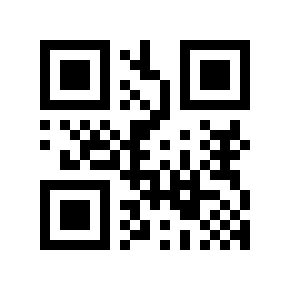

In [2]:
register_product("PROD001", "Laptop", "TechCorp")

Transaction hash: 0x6e64d5693e8ce07380c9b51386efebb5be1298ceeb915986f0bd43c71c06032c
Transaction receipt: AttributeDict({'transactionHash': HexBytes('0x6e64d5693e8ce07380c9b51386efebb5be1298ceeb915986f0bd43c71c06032c'), 'transactionIndex': 0, 'blockNumber': 11, 'blockHash': HexBytes('0xabf816a91776357ef160963b0e19564ef745c1320be47886ccaa944f7a585dea'), 'from': '0x8B0F305E394Bcc45F1dd84D7d56A172DAF0350FC', 'to': '0x7Ef1b11bb8825B601f3F30D239e42A9698aB1E5b', 'cumulativeGasUsed': 29090, 'gasUsed': 29090, 'contractAddress': None, 'logs': [], 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

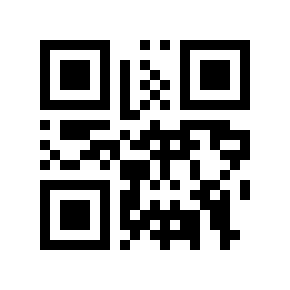

In [3]:
register_product("1234567890", "Product A", "Manufacturer A")

Transaction hash: 0x098cfdb102c16974e42ef11a021138d208bd34faad13727f4631ec8c26ee95cb
Transaction receipt: AttributeDict({'transactionHash': HexBytes('0x098cfdb102c16974e42ef11a021138d208bd34faad13727f4631ec8c26ee95cb'), 'transactionIndex': 0, 'blockNumber': 12, 'blockHash': HexBytes('0x736efbac1e1aa30e7bf533b729b2778f8fbbaf3869e10b5b6159347eacef9cf9'), 'from': '0x8B0F305E394Bcc45F1dd84D7d56A172DAF0350FC', 'to': '0x7Ef1b11bb8825B601f3F30D239e42A9698aB1E5b', 'cumulativeGasUsed': 29090, 'gasUsed': 29090, 'contractAddress': None, 'logs': [], 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

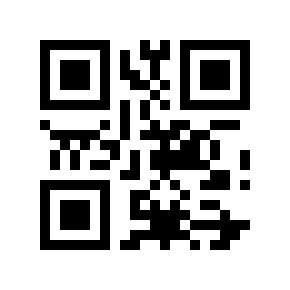

In [4]:
register_product("0987654321", "Product B", "Manufacturer B")

In [5]:
verify_product("1234567890")

Product with ID 1234567890 is authentic.


In [6]:
verify_product("0987654321")

Product with ID 0987654321 is authentic.


In [7]:
verify_product("0000000000")

An RPC error was returned by the node. Check the message provided in the error and any available logs for more information.


Product with ID 0000000000 is NOT authentic.
